<a href="https://colab.research.google.com/github/mohitraosatya/maybell-cooling-optimizer/blob/main/termite_cooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

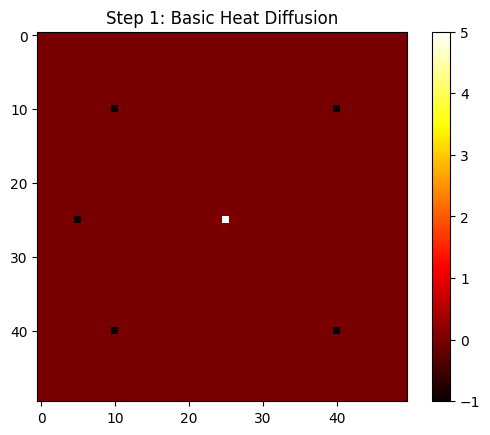

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Grid size
nx, ny = 50, 50
dx = dy = 1.0
dt = 0.1
alpha = 0.1  # thermal diffusivity (uniform for now)

# Initialize temperature grid
T = np.zeros((nx, ny))
T_new = np.zeros((nx, ny))

# Add central heat source
center_x, center_y = nx // 2, ny // 2
T[center_x, center_y] = 5.0  # simulate quantum processor

# Add vents (passive cold spots)
vent_positions = [(10, 10), (25, 5), (40, 10), (10, 40), (40, 40)]
for x, y in vent_positions:
    T[x, y] = -1.0

# Heat diffusion step
def update_heat(T):
    T_new = T.copy()
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            T_new[i, j] = T[i, j] + alpha * dt * (
                (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 +
                (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy**2
            )
    for x, y in vent_positions:
        T_new[x, y] = -1.0  # reset vent temperature
    T_new[center_x, center_y] = 5.0  # reset heat source
    return T_new

# Plot animation
fig, ax = plt.subplots()
cax = ax.imshow(T, cmap='hot', vmin=-1, vmax=5)
plt.colorbar(cax)
plt.title("Step 1: Basic Heat Diffusion")

def animate(frame):
    global T
    T = update_heat(T)
    cax.set_data(T)
    return [cax]

ani = FuncAnimation(fig, animate, frames=100, interval=100, blit=True)
plt.show()


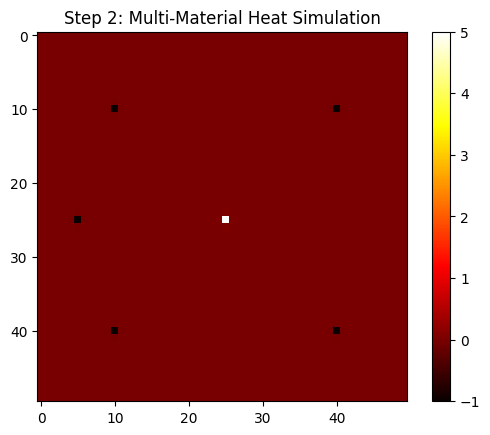

In [6]:
# Step 2: Material Layer Simulation (Advanced Diffusion)
nx, ny = 50, 50
dx = dy = 1.0
dt = 0.1

# Material thermal diffusivities
AIR = 0.1
COPPER = 0.6
ALUMINUM = 0.3
INSULATION = 0.01

# Create material grid (AIR by default)
material_grid = np.full((nx, ny), AIR)

# Add COPPER stripes
material_grid[15:20, 15:35] = COPPER

# Add ALUMINUM plate
material_grid[30:35, 10:40] = ALUMINUM

# Add INSULATION barrier
material_grid[22:28, 22:28] = INSULATION

# Initialize temperature grid
T = np.zeros((nx, ny))
T_new = np.zeros((nx, ny))

# Passive vents
vent_positions = [(10, 10), (25, 5), (40, 10), (10, 40), (40, 40)]
for x, y in vent_positions:
    T[x, y] = -1.0

# Quantum load (heat source)
center_x, center_y = nx // 2, ny // 2
T[center_x, center_y] = 5.0

# Heat diffusion using material grid
def update_heat_materials(T):
    T_new = T.copy()
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            alpha = material_grid[i, j]
            T_new[i, j] = T[i, j] + alpha * dt * (
                (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 +
                (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy**2
            )
    for x, y in vent_positions:
        T_new[x, y] = -1.0
    T_new[center_x, center_y] = 5.0
    return T_new

# Plot animation
fig, ax = plt.subplots()
cax = ax.imshow(T, cmap='hot', vmin=-1, vmax=5)
plt.colorbar(cax)
plt.title("Step 2: Multi-Material Heat Simulation")

def animate(frame):
    global T
    T = update_heat_materials(T)
    cax.set_data(T)
    return [cax]

ani = FuncAnimation(fig, animate, frames=150, interval=100, blit=True)
plt.show()


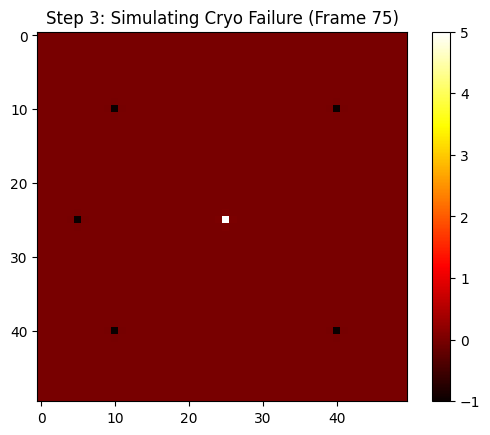

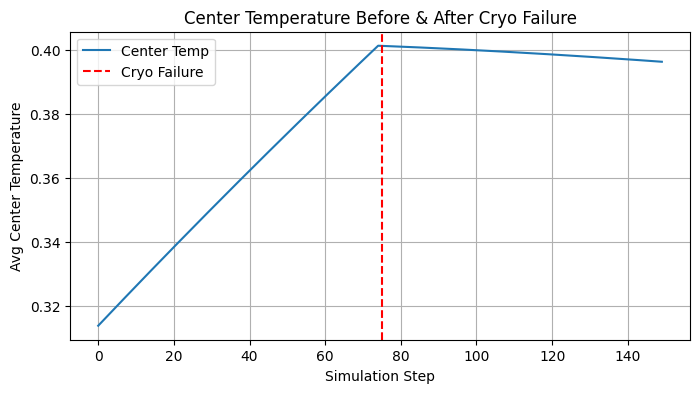

In [9]:
# Step 3: Add Failure Mode and Observe Passive Cooling Response
nx, ny = 50, 50
dx = dy = 1.0
dt = 0.1
failure_step = 75  # Cryo failure at this step

# Material thermal diffusivities
AIR = 0.1
COPPER = 0.6
ALUMINUM = 0.3
INSULATION = 0.01

# Setup material grid
material_grid = np.full((nx, ny), AIR)
material_grid[15:20, 15:35] = COPPER
material_grid[30:35, 10:40] = ALUMINUM
material_grid[22:28, 22:28] = INSULATION

# Initialize temperature grid
T = np.zeros((nx, ny))
T_new = np.zeros((nx, ny))

# Vents
vent_positions = [(10, 10), (25, 5), (40, 10), (10, 40), (40, 40)]
for x, y in vent_positions:
    T[x, y] = -1.0

# Heat source
center_x, center_y = nx // 2, ny // 2
T[center_x, center_y] = 5.0

# Heat update function with cryo failure logic
def update_with_failure(T, step):
    T_new = T.copy()
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            alpha = material_grid[i, j]
            T_new[i, j] = T[i, j] + alpha * dt * (
                (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 +
                (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy**2
            )

    # Keep vents cool
    for x, y in vent_positions:
        T_new[x, y] = -1.0

    # Before failure, keep source hot
    if step < failure_step:
        T_new[center_x, center_y] = 5.0

    return T_new

# Plot and animate
fig, ax = plt.subplots()
cax = ax.imshow(T, cmap='hot', vmin=-1, vmax=5)
plt.colorbar(cax)
plt.title("Step 3: Simulating Cryo Failure (Frame 75)")

def animate(frame):
    global T
    T = update_with_failure(T, frame)
    cax.set_data(T)
    return [cax]

ani = FuncAnimation(fig, animate, frames=150, interval=100, blit=True)
plt.show()

# Track center temperature over time
T = np.zeros((nx, ny))
for x, y in vent_positions:
    T[x, y] = -1.0
T[center_x, center_y] = 5.0

center_temps = []

for step in range(150):
    T = update_with_failure(T, step)
    center_avg = np.mean(T[center_x-2:center_x+2, center_y-2:center_y+2])
    center_temps.append(center_avg)

# Plot temperature over time at center
plt.figure(figsize=(8, 4))
plt.plot(center_temps, label="Center Temp")
plt.axvline(x=failure_step, color='r', linestyle='--', label="Cryo Failure")
plt.xlabel("Simulation Step")
plt.ylabel("Avg Center Temperature")
plt.title("Center Temperature Before & After Cryo Failure")
plt.legend()
plt.grid(True)
plt.show()


Pattern 1 - Avg Center Temp (last 10 steps): 0.8414
Pattern 2 - Avg Center Temp (last 10 steps): 0.8414
Pattern 3 - Avg Center Temp (last 10 steps): 0.8414
Pattern 4 - Avg Center Temp (last 10 steps): 0.8414
Pattern 5 - Avg Center Temp (last 10 steps): 0.8411

✅ Best Pattern Chosen:
Vents: [(20, 20), (20, 30), (30, 20), (30, 30)]


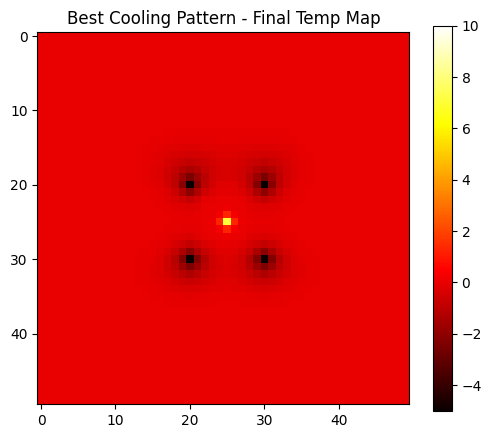

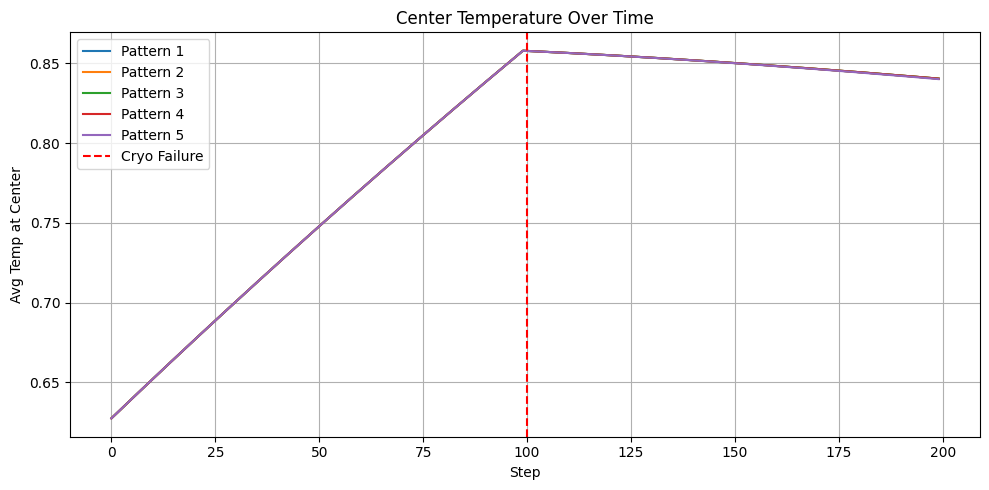

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Settings (upgraded for contrast)
nx, ny = 50, 50
dx = dy = 1.0
dt = 0.1
steps = 200
failure_step = 100

# Material diffusivity
AIR = 0.1
COPPER = 0.6
ALUMINUM = 0.3
INSULATION = 0.01

# Quantum heat source
center_x, center_y = nx // 2, ny // 2

# Create base material grid
def create_material_grid():
    grid = np.full((nx, ny), AIR)
    grid[15:20, 15:35] = COPPER
    grid[30:35, 10:40] = ALUMINUM
    grid[22:28, 22:28] = INSULATION
    return grid

# Generate multiple vent layouts
vent_patterns = [
    [(10, 10), (25, 5), (40, 10), (10, 40), (40, 40)],
    [(5, 5), (5, 45), (45, 5), (45, 45)],
    [(15, 15), (35, 35), (15, 35), (35, 15)],
    [(10, 25), (25, 10), (40, 25), (25, 40)],
    [(20, 20), (20, 30), (30, 20), (30, 30)],
]

# Heat update for a given pattern
def run_simulation(vent_positions):
    T = np.zeros((nx, ny))
    material_grid = create_material_grid()
    center_temps = []

    # Set vents and heat source
    for x, y in vent_positions:
        T[x, y] = -5.0
    T[center_x, center_y] = 10.0

    for step in range(steps):
        T_new = T.copy()
        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                alpha = material_grid[i, j]
                T_new[i, j] = T[i, j] + alpha * dt * (
                    (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 +
                    (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy**2
                )

        for x, y in vent_positions:
            T_new[x, y] = -5.0  # aggressive vent cooling

        if step < failure_step:
            T_new[center_x, center_y] = 10.0  # active cooling before failure

        T = T_new.copy()
        center_avg = np.mean(T[center_x-2:center_x+2, center_y-2:center_y+2])
        center_temps.append(center_avg)

    return center_temps, T

# Run all simulations
results = []
for idx, vents in enumerate(vent_patterns):
    temps, final_T = run_simulation(vents)
    avg_final = np.mean(temps[-10:])  # average last 10 steps
    results.append((avg_final, vents, final_T, temps))
    print(f"Pattern {idx+1} - Avg Center Temp (last 10 steps): {avg_final:.4f}")

# Choose best
best_result = min(results, key=lambda x: x[0])
print("\n✅ Best Pattern Chosen:")
print("Vents:", best_result[1])

# Plot best final heatmap
plt.figure(figsize=(6, 5))
plt.imshow(best_result[2], cmap='hot', vmin=-5, vmax=10)
plt.title("Best Cooling Pattern - Final Temp Map")
plt.colorbar()
plt.show()

# Plot center temps over time for all patterns
plt.figure(figsize=(10, 5))
for i, (score, vents, grid, temps) in enumerate(results):
    plt.plot(temps, label=f"Pattern {i+1}")
plt.axvline(x=failure_step, color='r', linestyle='--', label='Cryo Failure')
plt.title("Center Temperature Over Time")
plt.xlabel("Step")
plt.ylabel("Avg Temp at Center")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
